### Linear Regression:--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### Scatter plot:

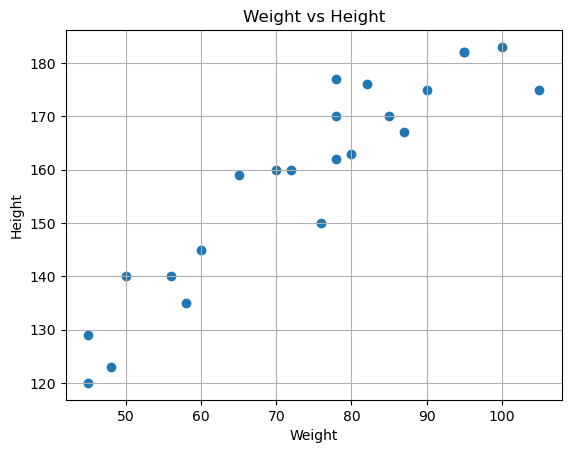

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

### Correlation:--

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


### Seaborn Visualisation:--

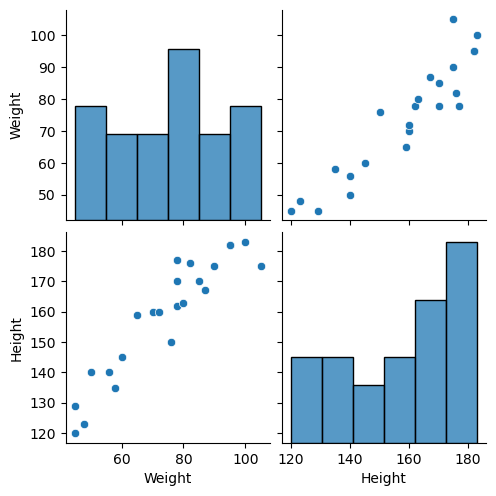

In [9]:
import seaborn as sns
sns.pairplot(df)
plt.show()

###  Dependent and indepedent features:

In [10]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [11]:
X=df[['Weight']]   #independent feature always in 2D. use double [[]] like this.
print(X)


    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72


In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
np.array(X).shape    #it will show 2D array as follows.

(23, 1)

In [14]:
X=df['Weight']
np.array(X).shape    #it will show 1D array as follows.

(23,)

In [15]:
X = df[['Weight']]   #independent feature always in 2D. use double [[]] like this.
y = df['Height']    #dependent feature could be 2D. but keep in 1D. 
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [16]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

### Train Test Split:--

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train.shape   #this should be 2D

(17, 1)

### Standardization:--

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

We don’t use fit_transform on the test data, because that would cause data leakage.

The fit step calculates statistics (like mean and standard deviation in StandardScaler).

If we call fit on the test data, we’ll be using information from the test set during training, which is not allowed.

Instead, we only fit on the training data and then transform the test data using the same parameters (mean, std, etc.) learned from the training set.

This way, the model evaluates the test set as if it were unseen, ensuring a fair evaluation.

In [25]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### Apply Linear Regression:

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression(n_jobs=-1)  #it will run on the all processors. 

In [29]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [36]:
print(f' Coeffcient or slope: {regression.coef_}')

 Coeffcient or slope: [17.2982057]


In [37]:
print(f'Intercept: {regression.intercept_}')

Intercept: 156.47058823529412
